In [1]:
import os
import sys
from pathlib import Path

# Get the notebook's directory
notebook_dir = os.getcwd()

# Add the notebook directory and its parent to Python path
sys.path.append(notebook_dir)
sys.path.append(str(Path(notebook_dir).parent))


# Function to add all subdirectories to Python path
def add_subdirs_to_path():
    for root, dirs, files in os.walk(notebook_dir):
        for dir_name in dirs:
            full_path = os.path.join(root, dir_name)
            if full_path not in sys.path:
                sys.path.append(full_path)


# Add all subdirectories
add_subdirs_to_path()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import plotly.express as px

from feature_engineering import engineer_features
from utils.load_data import load_data
from data_cleaning.data_cleaning import clean_data

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [4]:
df = load_data("../data/train.csv")
df = engineer_features(df)
df = clean_data(df)

In [5]:
print(df['MSSubClass'].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


In [6]:
def regroup_mssubclass_corrected(mssubclass):
    if mssubclass in [40, 180, 45, 75, 85]: 
        return 500
    return mssubclass


In [7]:
# df['MSSubClass_regrouped'] = df['MSSubClass'].apply(regroup_mssubclass_corrected)
print(df['MSSubClass_regrouped'].value_counts())

MSSubClass_regrouped
20     536
60     299
50     144
120     87
30      69
160     63
500     62
70      60
80      58
90      52
190     30
Name: count, dtype: int64


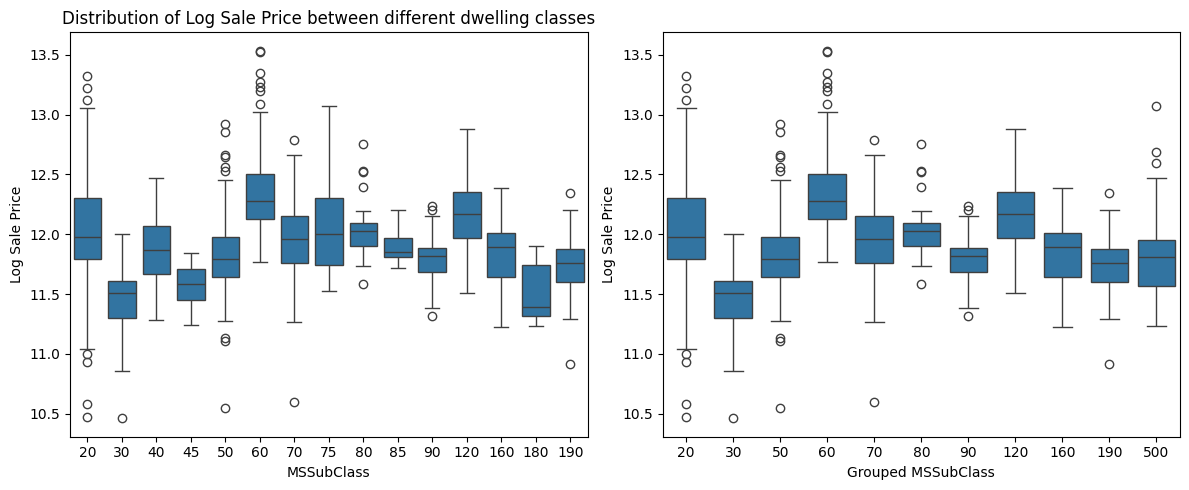

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set(ylabel="Log Sale Price", title="Distribution of Log Sale Price between different dwelling classes")
sns.boxplot(df, x = "MSSubClass", y="log_sale_price", ax=ax1)

ax2.set(xlabel="Grouped MSSubClass", ylabel="Log Sale Price")
sns.boxplot(df, x = 'MSSubClass_regrouped', y="log_sale_price", ax=ax2)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

# For original MSSubClass (using one-hot encoding)
X_orig = pd.get_dummies(df['MSSubClass'], drop_first=True)
y = df['SalePrice']
model_orig = LinearRegression().fit(X_orig, y)
r2_orig = model_orig.score(X_orig, y)

# For grouped MSSubClass
X_grouped = pd.get_dummies(df['MSSubClass_regrouped'], drop_first=True)
model_grouped = LinearRegression().fit(X_grouped, y)
r2_grouped = model_grouped.score(X_grouped, y)

print(f"Original MSSubClass R^2: {r2_orig:.4f}")
print(f"Grouped MSSubClass R^2: {r2_grouped:.4f}")

Original MSSubClass R^2: 0.2463
Grouped MSSubClass R^2: 0.2386


In [10]:
from sklearn.model_selection import cross_val_score

# For original MSSubClass
X_orig = pd.get_dummies(df['MSSubClass'], drop_first=True)
cv_scores_orig = cross_val_score(LinearRegression(), X_orig, y, cv=5, scoring='r2')

# For grouped MSSubClass
X_grouped = pd.get_dummies(df['MSSubClass_regrouped'], drop_first=True)
cv_scores_grouped = cross_val_score(LinearRegression(), X_grouped, y, cv=5, scoring='r2')

print(f"Original MSSubClass mean CV R^2: {np.mean(cv_scores_orig):.4f}")
print(f"Grouped MSSubClass mean CV R^2: {np.mean(cv_scores_grouped):.4f}")

Original MSSubClass mean CV R^2: 0.2376
Grouped MSSubClass mean CV R^2: 0.2343
